# Making initial imports

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np
from datetime import datetime # for parsing english-formatted date
import dateparser # for parsing french-formatted date

In [20]:
# NLP library imports
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/zigfridzvezdin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/zigfridzvezdin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Loading data scrapped on TrustPilot

The dataframe is  composed with the comments scraped on Trustpolit at [this page](https://fr.trustpilot.com/review/www.centerparcs.fr/fr-fr).

First delete double backslashes for Python to recognize correctly the _utf-8_ encoding.

_sed_ is a terminal command that replaces the strings by a given string  
_sed_ use the 's#str1#str2#g' where __#__ plays the role of a delimiter and could be  __any__ character  
one might use both signle and double quotes  
in order to represent one backslash one need to type four of them 

In [21]:
# execute when the input file is not formatted
# ! sed -i -e "s \\\\\\\\' ' g" check.json
# ! sed -i -e 's/\\\\/\\/g' check.json
# ! rm check.json-e

In [25]:
df = pd.read_json('tripadvisorenfinal1.json')

In [26]:
df.head()

,hotel_adress,hotel_name,hotel_type,image_url,locid,pid,published_date,rating,review,review_id,review_language,reviewer_id,title,trip_date,trip_type
0,"{'@type': 'PostalAddress', 'streetAddress': ''...",Center Parcs Longleat Forest,LodgingBusiness,https://media-cdn.tripadvisor.com/media/photo-...,523986,38673,"December 8, 2013",3,"We've just returned from a midweek break, we w...",187104352,en,AC7AE042F6D08EA45C748F0D8AA73830,"I LOVE LOVE LOVE CENTER PARCS, BUT WHATS HAPPE...",December 2013,None
1,"{'@type': 'PostalAddress', 'streetAddress': ''...",Center Parcs Longleat Forest,LodgingBusiness,https://media-cdn.tripadvisor.com/media/photo-...,523986,38673,"December 9, 2013",5,This was our first visit and certainly won't ...,187160229,en,AF4A7072D1181F20987A94804077F8B7,Terrific family break,December 2013,None
2,"{'@type': 'PostalAddress', 'streetAddress': ''...",Center Parcs Longleat Forest,LodgingBusiness,https://media-cdn.tripadvisor.com/media/photo-...,523986,38673,"December 9, 2013",5,We went to Longleat for a mid week break for m...,187170672,en,523B12D984E439636DA0CF7880EC3174,"Romantic Mid week break, FANTASTIC!",December 2013,None
3,"{'@type': 'PostalAddress', 'streetAddress': ''...",Center Parcs Longleat Forest,LodgingBusiness,https://media-cdn.tripadvisor.com/media/photo-...,523986,38673,"December 9, 2013",5,I visited Centre Parcs with my children at the...,187175058,en,6F79F8336EB6BA0ABE0AF43C1069FADA,Relaxing break second time around..,December 2013,None
4,"{'@type': 'PostalAddress', 'streetAddress': ''...",Center Parcs Longleat Forest,LodgingBusiness,https://media-cdn.tripadvisor.com/media/photo-...,523986,38673,"December 9, 2013",4,Just had a weekend break at Center Parcs Longl...,187184263,en,C543F6BF0BEBE533AE42C5690CEC09D5,Center Parcs Longleat Forest,December 2013,None


# Shapping dataFrame

**Making some modifications from raw data**

In [27]:
df = df[["review","published_date","rating","title", "review_language", "trip_date"]]
df.columns = ['review', 'date', 'rating', 'title', 'language', 'trip_date']
df['hotel'] = 'Longleat Forest'
df['source'] = 'TripAdvisor'
#df.columns = ["content","date","name","stars","title","review_language", "trip_date"]

#df = df.dropna(axis=0, subset=['published_date'])

# Changing the date format for English reviews.
df[df.language == 'en'].date = df[df.language == 'en'].date.apply(lambda s: datetime.strptime(s, '%B %d, %Y'))
    
# Changing the date format for French reviews.
df[df.language == 'fr'].date = df[df.language == 'fr'].date.apply(lambda s: dateparser.parse(s).date())
    
    
#maybe change to the day of the trip too
    
#i = 0
#for date_string in df.date:
#    df.date[i] = dateparser.parse(date_string).date()
#    i = i +1

# later 
#df.review = df.review.apply(lambda x: ' '.join(x.split()).lower())
    
#df = df[["content","date","name","stars","title", "trip_date", "review_language", "trip_type"]]

# Setting date as index
df.set_index('date', inplace = True)

#  Displaying result
df.head()

/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


,review,rating,title,language,trip_date,hotel,source
date,,,,,,,
"December 8, 2013","We've just returned from a midweek break, we w...",3,"I LOVE LOVE LOVE CENTER PARCS, BUT WHATS HAPPE...",en,December 2013,Longleat Forest,TripAdvisor
"December 9, 2013",This was our first visit and certainly won't ...,5,Terrific family break,en,December 2013,Longleat Forest,TripAdvisor
"December 9, 2013",We went to Longleat for a mid week break for m...,5,"Romantic Mid week break, FANTASTIC!",en,December 2013,Longleat Forest,TripAdvisor
"December 9, 2013",I visited Centre Parcs with my children at the...,5,Relaxing break second time around..,en,December 2013,Longleat Forest,TripAdvisor
"December 9, 2013",Just had a weekend break at Center Parcs Longl...,4,Center Parcs Longleat Forest,en,December 2013,Longleat Forest,TripAdvisor


# Exploratory Data Analysis

In [444]:
# Even if not really useful for this case, a good habit is to start with df.describe() and df.info() when you start working on a dataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3170 entries, 2013-12-08 to 2005-09-13
Data columns (total 7 columns):
content            3170 non-null object
name               3170 non-null object
stars              3170 non-null int64
title              3170 non-null object
trip_date          3160 non-null object
review_language    3170 non-null object
trip_type          101 non-null object
dtypes: int64(1), object(6)
memory usage: 198.1+ KB


**Studying eventual doubles**

- We're here looking at names which are pseudos. Be careful, differents people could use the same ones. The date is a good indicator to know if the same person let 2 comments.

In [445]:


print('Number of comments', df.name.count())
print('Number of unique names: ', df.name.nunique())

double = df.name.value_counts().index.tolist()[:sum(df.name.value_counts()>=2)]
for name in double:
    print('\n',name)
    date_double = df[df.name==name].index.tolist()
    content_double = df[df.name==name].content.tolist()
    [print(date,content) for date,content in zip(date_double,content_double)]

Number of comments 3170
Number of unique names:  3048

 2e7e8588f675d25f883054869bb730b5
2013-04-06 00:00:00 my husband and two young daughters (7&amp;3) returned yesterday from our 10th visit to longleat and you'll see from our previous reviews that we have always rated our stays as excellent however this time i do have to mark the stay down slightly. first the good points:- we stayed in a two bedroom (one double, one twin) woodland lodge right by the plaza, in the ash area. as always it was spacious, well equipped, warm &amp; cosy. there is a main bathroom, containing a bath with shower attachment. there is also a wc out in the hallway, however see negative points below.- staff very pleasant, friendly, helpful &amp; efficient as always. - wide range of activities available but most do cost extra. indicative prices can be found on the website before booking to give you an idea of what these extras will cost. we enjoyed mini bowling, indoor putting, snooker, a massage and our daughters

You might find interesting things in your dataset. 

For example it is fun here to see **Peltier**'s comments and how he changed is mind:

- April 14th 13:41 : "formule intéressante pour de courtes vacances"
- April 14th 20:33 : "pas de réseau et deux chaines tv manquantes" 



**Rapid overview of global rating**


Average rating is : 4.08


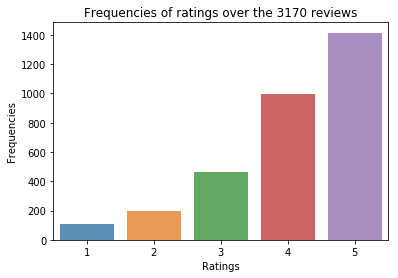

In [446]:
# Average rating value
print('Average rating is : {}'.format(round(df.stars.mean(),2)))

# Plotting rating distribution
X_ratings = df.stars.value_counts()
ax = sns.barplot(X_ratings.index,X_ratings,alpha=0.8)
ax.set(xlabel='Ratings',ylabel='Frequencies',title='Frequencies of ratings over the {} reviews'.format(df.shape[0]))
plt.show()

**Distribution of comments length**

/Users/po/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


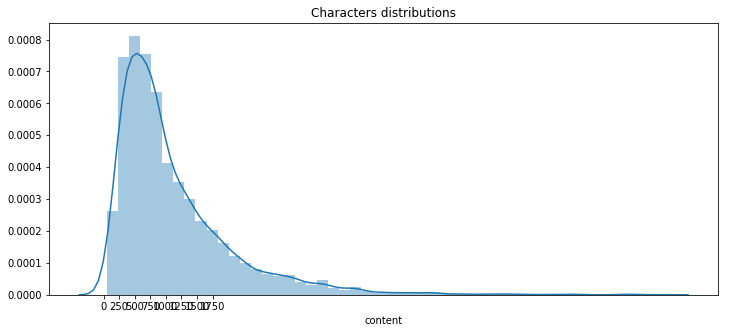

In [447]:
# Making the plot
x = plt.figure(figsize=(12,5))
sns.distplot(df['content'].apply(len))
plt.title('Characters distributions')
plt.xticks(range(0,2000,250))
plt.show()


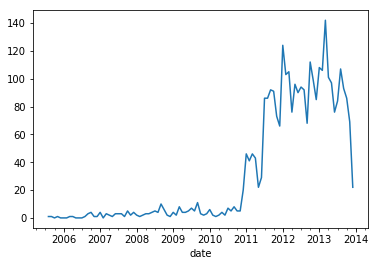

In [448]:
# Repartition of reviews dates

df.head()
df['content'].resample('M').count().plot()

# Pre-Processing 1 : Filters for punctuation and specific characters

In [834]:
df_token = pd.read_csv('DataFrameCleanedFinal.csv')
df_token.head
# creating a list with all reviews
all_reviews = df_token.review.tolist()

In [835]:
# transformating comments into lower-case text 
lower_reviews = [review.lower() for review in all_reviews]
print(len(lower_reviews))

11322


In [836]:
# deleting all specific caracters
characters_to_remove = ["@", "/", "#", ".", ",", "!", "?", "(", ")", "-", "_","’","'", "\"", ":", ";"]
transformation_dict = {initial:" " for initial in characters_to_remove}
no_punctuation_reviews = [review.translate(str.maketrans(transformation_dict)) for review in lower_reviews]

In [837]:
# removing accent
with_accent = ['é', 'è', 'à']
without_accent = ['e', 'e', 'a']
transformation_dict = {before:after for before, after in zip(with_accent, without_accent)}
no_accent_reviews = [review.translate(str.maketrans(transformation_dict)) for review in no_punctuation_reviews]

In [838]:
# Displaying some results 
for i in range(5):
    print(all_reviews[i])
    print(no_accent_reviews[i])
    print('\n')

once again we enjoyed a wonderful stay at longleat centerparcs.this time one of our friends was celebrating a major birthday, so we had two lodges, one from friday to friday for us and our friends, another for some of his family for the weekend, friday to monday.this time we were in fir near the top of the cascades and our only complaint would be that there were refurbishment works going on to the neighbouring lodges, which meant that there were trades vehicles parked up and down the road and the inevitable noise that accompanies construction work!that aside we don't spend much time in the lodge during the day so it was more annoying than anything else.we enjoyed the high trees challenge with the exhilarating zip wire over the lake, this time it was a lot more challenging due to the colder weather and the fact it was drizzling with rain, but the feeling of accomplishment was exponentially higher. my daughter also especially enjoyed the archery, but best of all was the sub-tropical swim

In [839]:
def number_of_unique_words(list_of_reviews):
  
    # Concatenating all reviews from the list
    all_words = ''.join(list_of_reviews)

    # Tokenizing
    unique_tokens = set(word_tokenize(all_words))
  
    # Returning length of list
    return len(unique_tokens)

In [840]:
print(number_of_unique_words(all_reviews))

53551


In [841]:
print(number_of_unique_words(lower_reviews))

53551


In [842]:
print(number_of_unique_words(no_punctuation_reviews))

31699


In [843]:
print(number_of_unique_words(no_accent_reviews))

KeyboardInterrupt: 

# Pre-processing 2 : Tokenization

**Doing it in two different ways**

In [844]:
# Using regular expression
tokenized_reviews_re = [re.split('\s+', review) for review in no_accent_reviews]

In [845]:
# using NLP libraries
tokenized_reviews_nltk = [word_tokenize(review) for review in no_accent_reviews]

**And making a comparison of results**

In [846]:
# Making a comparison between both of them
print("With NLTK  library : {}".format(len(tokenized_reviews_nltk)))
print("With RegEx library : {}".format(len(tokenized_reviews_re)))

With NLTK  library : 11322
With RegEx library : 11322


**Try to analyze the next lines of code and to understand the difference between both of them**

Here is an original review

In [847]:
# Choosing a review to inspect
n_review = 10
print(all_reviews[n_review])

i feel compelled to review after reading all the emotionally driven negative ones off the back of the issue from the snow during thursday night 31st jan. we were due to leave on friday 1st feb and cp were absolutely right to cancel the weekend guests. the conditions on site were so hazardous and there was no way they could allow cars back on site for the departing guests to leave, think of the elderly, babies, kids etc. this would have resulted in multiple accidents for which cp would be responsible. the abuse some of the staff took from the arriving guests was disgraceful resulting in tears. it wasn't cps fault it snowed. the majority of incoming guests arrived well after being told they were cancelling incoming booking and were trying their luck. what did they expect to be able to do at cp all weekend with snow and limited staff able to get on site?ignore the negative reviews. it must be frustrating that your weekend away was a ruined but this is no way was cps fault. as for our week

And here are the tokenized ones

In [848]:
print(tokenized_reviews_nltk[n_review])

['i', 'feel', 'compelled', 'to', 'review', 'after', 'reading', 'all', 'the', 'emotionally', 'driven', 'negative', 'ones', 'off', 'the', 'back', 'of', 'the', 'issue', 'from', 'the', 'snow', 'during', 'thursday', 'night', '31st', 'jan', 'we', 'were', 'due', 'to', 'leave', 'on', 'friday', '1st', 'feb', 'and', 'cp', 'were', 'absolutely', 'right', 'to', 'cancel', 'the', 'weekend', 'guests', 'the', 'conditions', 'on', 'site', 'were', 'so', 'hazardous', 'and', 'there', 'was', 'no', 'way', 'they', 'could', 'allow', 'cars', 'back', 'on', 'site', 'for', 'the', 'departing', 'guests', 'to', 'leave', 'think', 'of', 'the', 'elderly', 'babies', 'kids', 'etc', 'this', 'would', 'have', 'resulted', 'in', 'multiple', 'accidents', 'for', 'which', 'cp', 'would', 'be', 'responsible', 'the', 'abuse', 'some', 'of', 'the', 'staff', 'took', 'from', 'the', 'arriving', 'guests', 'was', 'disgraceful', 'resulting', 'in', 'tears', 'it', 'wasn', 't', 'cps', 'fault', 'it', 'snowed', 'the', 'majority', 'of', 'incoming'

In [849]:
print(tokenized_reviews_re[n_review])

['i', 'feel', 'compelled', 'to', 'review', 'after', 'reading', 'all', 'the', 'emotionally', 'driven', 'negative', 'ones', 'off', 'the', 'back', 'of', 'the', 'issue', 'from', 'the', 'snow', 'during', 'thursday', 'night', '31st', 'jan', 'we', 'were', 'due', 'to', 'leave', 'on', 'friday', '1st', 'feb', 'and', 'cp', 'were', 'absolutely', 'right', 'to', 'cancel', 'the', 'weekend', 'guests', 'the', 'conditions', 'on', 'site', 'were', 'so', 'hazardous', 'and', 'there', 'was', 'no', 'way', 'they', 'could', 'allow', 'cars', 'back', 'on', 'site', 'for', 'the', 'departing', 'guests', 'to', 'leave', 'think', 'of', 'the', 'elderly', 'babies', 'kids', 'etc', 'this', 'would', 'have', 'resulted', 'in', 'multiple', 'accidents', 'for', 'which', 'cp', 'would', 'be', 'responsible', 'the', 'abuse', 'some', 'of', 'the', 'staff', 'took', 'from', 'the', 'arriving', 'guests', 'was', 'disgraceful', 'resulting', 'in', 'tears', 'it', 'wasn', 't', 'cps', 'fault', 'it', 'snowed', 'the', 'majority', 'of', 'incoming'

In [852]:
# We select the secon one which seems more accurate
tokenized_reviews = tokenized_reviews_nltk
df_token["review"] = stopword_reviews
df_token.head()

,date,review,rating,title,trip_date,language,hotel,source
0,2019-02-03,once again we enjoyed a wonderful stay at long...,5,Sub-Tropical Swimming Paradise,January 2019,en,Longleat Forest,TripAdvisor
1,2019-02-04,we had a long weekend break booked for 8 of us...,1,Appalling customer service,February 2019,en,Longleat Forest,TripAdvisor
2,2019-02-04,we stayed mon fri in the fir area this is a 45...,5,Snow,January 2019,en,Longleat Forest,TripAdvisor
3,2019-02-04,we have been to center parcs longleat numerous...,1,Disaster in management,February 2019,en,Longleat Forest,TripAdvisor
4,2019-02-04,like many other people it would seem our break...,1,Almost visit,February 2019,en,Longleat Forest,TripAdvisor


# Pre-processing 3 : Stopword removing

In [854]:
# Using a list with words to delete
stopW = stopwords.words(['english','french'])

In [855]:
# Customizing it with our needs
stopW += ['les', 'a', 'tout', ';', 'us']

In [856]:
# Stopword_list
stopword_reviews = [[token for token in review if token not in stopW] for review in tokenized_reviews]
df_token["review"] = stopword_reviews
df_token.head()
df_token.to_csv("Datacleanedfinal1.csv", index=False)



# Some visualization about what we've done

In [615]:
def plot_frequent_words(list_of_words):    
    dist = nltk.FreqDist(list_of_words)
    X = [nb[1] for nb in dist.most_common(20)]
    y = [nb[0] for nb in dist.most_common(20)]
    ax = sns.barplot(X,y)
    ax.set(xlabel='Word frequencies',ylabel='Words',title='Most common words in the corpus')
    plt.show()

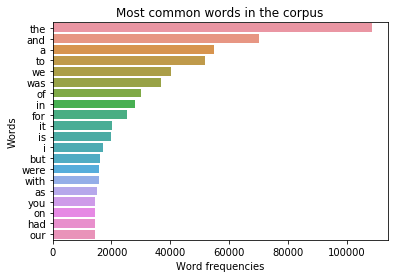

2159473


In [616]:
# Making a first plot with original data
all_words = []
for review in all_reviews:
    for word in review.split():
        all_words.append(word)

plot_frequent_words(all_words)
print(len(all_words))

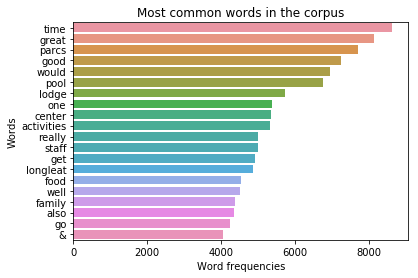

1104809


In [617]:
# And making it with our current data
all_words = []
for review in stopword_reviews:
    for word in review:
        all_words.append(word)

plot_frequent_words(all_words)
print(len(all_words))

df.to_csv("DataCleanedFinalProcessed.csv", index=True)

dfen1 = pd.read_csv('DataCleanedFinalProcessed.csv')


...Much better ! Isn't it ?

# TO DO : Now you can apply all of these methods to your own DataFrame


**The purpose is to create a second column with reviews content but processed and tokenized**

In [809]:
dfen1 = pd.read_csv('Datacleanedgroup11en1.csv')
dfen2 = pd.read_csv('Datacleanedgroup11en2.csv')
dffr = pd.read_csv('Datacleanedgroup11fr1.csv')

dffr.head
dfnew = pd.concat([dfen1, dfen2], axis=0)
print(dfnew.shape)
dfnew = pd.concat([dfnew, dffr], axis=0)
dfnew.to_csv("Datacleanedfinal.csv", index=False)


(9897, 8)


In [810]:
df1 = pd.read_csv('Datacleanedfinal.csv', index_col='date')
df1.head()



,content,name,stars,title,trip_date,review_language,trip_type
date,,,,,,,
2019-02-03,once again we enjoyed a wonderful stay at long...,e3e85c40ec2e6d6502343bee50c3e664,5,Sub-Tropical Swimming Paradise,January 2019,en,Traveled with friends
2019-02-04,we had a long weekend break booked for 8 of us...,f3cbcd42e17ae1129a2f03e52a0c48dc,1,Appalling customer service,February 2019,en,Traveled with friends
2019-02-04,we stayed mon-fri in the fir area.this is a 45...,36ee62981a8ded4e32fa5bec17db5ed9,5,Snow,January 2019,en,Traveled with family
2019-02-04,we have been to center parcs longleat numerous...,0b74a0df1d2b42866eace933fccfb3f6,1,Disaster in management,February 2019,en,Traveled with family
2019-02-04,like many other people it would seem our break...,49c2b40945d9eefa84ad6c3df0a6d47a,1,Almost visit,February 2019,en,Traveled with family


In [489]:
df1['hotel_name'] = 'Longleat Forest'
df1 = df1.drop(['name'],axis=1)

In [503]:
df1 = df1.drop(['trip_type'],axis=1)

In [500]:
df1['source'] = 'TripAdvisor'

In [504]:
df1.columns = ['review', 'rating', 'title', 'trip_date', 'language', 'hotel', 'source']

In [505]:
df1.head()

,review,rating,title,trip_date,language,hotel,source
date,,,,,,,
2019-02-03,once again we enjoyed a wonderful stay at long...,5,Sub-Tropical Swimming Paradise,January 2019,en,Longleat Forest,TripAdvisor
2019-02-04,we had a long weekend break booked for 8 of us...,1,Appalling customer service,February 2019,en,Longleat Forest,TripAdvisor
2019-02-04,we stayed mon-fri in the fir area.this is a 45...,5,Snow,January 2019,en,Longleat Forest,TripAdvisor
2019-02-04,we have been to center parcs longleat numerous...,1,Disaster in management,February 2019,en,Longleat Forest,TripAdvisor
2019-02-04,like many other people it would seem our break...,1,Almost visit,February 2019,en,Longleat Forest,TripAdvisor


In [509]:
df1.to_csv("DataFrameCleanedFinal.csv")

# BONUS : A little exercice about RegEx

**Try some patterns on the next strings**

You can use the different functions
- re.split() : to split my_string on the pattern and print the result.
- re.findall() : find all the occurences matching the pattern in the total string.

In [ ]:
import re
my_string = "Let's write RegEx!"

PATTERN = r"\s+"
# PATTERN = r"[a-z]"
# PATTERN = r"\w"
# PATTERN = r"\w+"

In [ ]:
re.findall(PATTERN, my_string)

In [ ]:
re.split(PATTERN, my_string)

**Given the table show in course, try to make the following match**

In [ ]:
# Write a pattern to match sentence endings: sentence_endings
sentence_endings = r"[___]"

# Split my_string on sentence endings and print the result
print(re.____(____, ____))

In [ ]:
# Find all capitalized words in my_string and print the result
capitalized_words = r"[___]\w+"
print(re.____(____, ____))

In [ ]:
# Split my_string on spaces and print the result
spaces = r"___"
print(re.____(____, ____))

In [ ]:
# Find all digits in my_string and print the result
digits = r"___"
print(re.____(____, ____))